In [1]:
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import data
from skimage import io
import cv2
import numpy as np

In [2]:
PATCH_SIZE = 25

# open the camera image

In [3]:
image = data.camera()

In [4]:
image2_path = 'img_lb2/1.jpg'
image3_path = 'img_lb2/img2.jpg'
new_image_path = 'img_lb2/new_img1.jpg'

In [5]:
image2 = io.imread(image2_path, as_gray=True) * 255

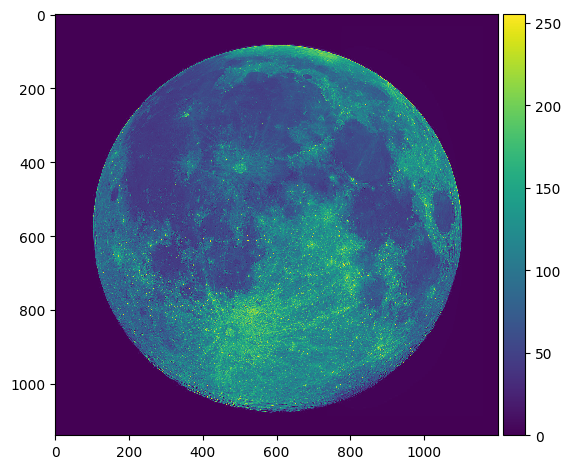

In [9]:
io.imshow(image2)
plt.show()

In [7]:
image3 = io.imread(image3_path, as_gray=True) * 255

In [8]:
new_image = io.imread(new_image_path, as_gray=True) * 255

# get coord

In [10]:
def coordinates_of_points(image_path):
    image = cv2.imread(image_path)
    image_copy = image.copy()  # Create a copy to draw on

    def mouse_callback(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            coords.append((y, x))
            cv2.circle(image_copy, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow("Image", image_copy)

    cv2.namedWindow("Image")
    cv2.setMouseCallback("Image", mouse_callback)

    coords = []
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Print the coordinates of the four points
    print("Coordinates of the 4 selected points:")
    for i, coord in enumerate(coords):
        print(f"Point {i+1}: x = {coord[0]}, y = {coord[1]}")

    return coords

In [18]:
coords = coordinates_of_points(image2_path)

Coordinates of the 4 selected points:
Point 1: x = 194, y = 376
Point 2: x = 217, y = 541
Point 3: x = 355, y = 813
Point 4: x = 528, y = 884


In [33]:
coords

[(551, 219), (635, 205), (825, 372), (395, 159)]

# whole function

In [13]:
def calculate_and_show(image, coords_dict, names):
    first_patches = []
    for loc in coords_dict['first_locations']:
        first_patches.append(image[loc[0]: loc[0] + PATCH_SIZE, 
                             loc[1]:loc[1] + PATCH_SIZE])

    second_patches = []
    for loc in coords_dict['second_locations']:
        second_patches.append(image[loc[0]: loc[0] + PATCH_SIZE, 
                           loc[1]:loc[1] + PATCH_SIZE])

    xs = []
    ys = []
    for patch in (first_patches + second_patches):
        glcm = graycomatrix(patch, distances=[5], angles=[0], 
                             levels=256, symmetric=True, normed=True)
        xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
        ys.append(graycoprops(glcm, 'correlation')[0, 0])

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(3, 2, 1)
    ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
    for (y, x) in coords_dict['first_locations']:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
    for (y, x) in coords_dict['second_locations']:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
    ax.set_xlabel('Original Image')
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.axis ('image')

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(3, 2, 2)
    ax.plot(xs[:len (first_patches)], ys[:len(first_patches)], 'go', label=names[0])
    ax.plot(xs[len (first_patches):], ys[len(first_patches):], 'bo', label=names[1])
    ax.set_xlabel('GLCM Dissimilarity')
    ax.set_ylabel('GLCM Correlation')
    ax.legend()

    fig = plt.figure(figsize=(8, 8))
    for i, patch in enumerate(first_patches):
        ax = fig.add_subplot(3, len(first_patches), len(first_patches)*1 + i + 1) 
        ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
        ax.set_xlabel(f'{names[0]} %d' % (i + 1))

    fig = plt.figure(figsize=(8, 8))
    for i, patch in enumerate(second_patches):
        ax = fig.add_subplot(3, len(second_patches), len(second_patches)*2+ i + 1) 
        ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
        ax.set_xlabel(f'{names[1]} %d' % (i + 1))

    fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05) 
    plt.tight_layout()
    plt.show()

# Other

In [24]:
coords_dict = dict()
coords_dict['first_locations'] = coordinates_of_points(new_image_path)
coords_dict['second_locations'] = coordinates_of_points(new_image_path)

Coordinates of the 4 selected points:
Point 1: x = 307, y = 16
Point 2: x = 254, y = 445
Point 3: x = 199, y = 509
Point 4: x = 460, y = 582
Coordinates of the 4 selected points:
Point 1: x = 76, y = 147
Point 2: x = 40, y = 430
Point 3: x = 121, y = 648
Point 4: x = 157, y = 305


In [25]:
coords_dict

{'first_locations': [(307, 16), (254, 445), (199, 509), (460, 582)],
 'second_locations': [(76, 147), (40, 430), (121, 648), (157, 305)]}

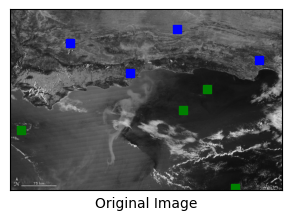

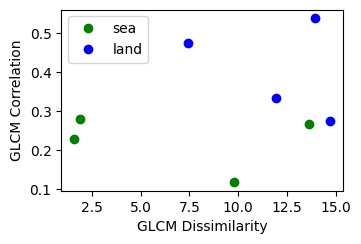

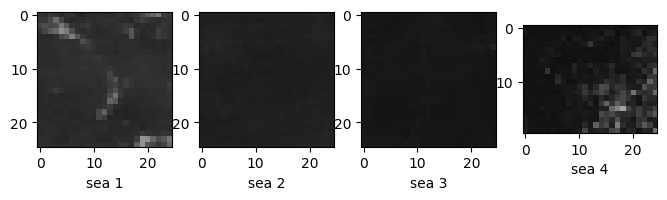

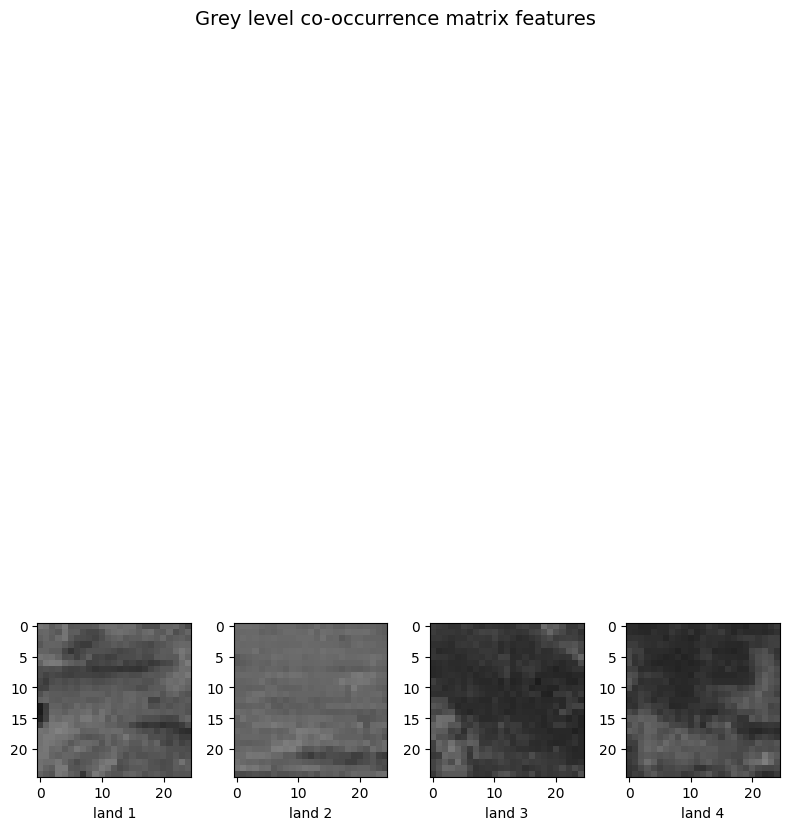

In [28]:
calculate_and_show(new_image.astype(np.uint), coords_dict, ["sea", "land"])

# select patches

In [10]:
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)] 
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]: loc[0] + PATCH_SIZE, 
                         loc[1]:loc[1] + PATCH_SIZE])

In [11]:
sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)] 
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]: loc[0] + PATCH_SIZE, 
                       loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch

In [12]:
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], 
                         levels=256, symmetric=True, normed=True)
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])

# display original image with locations of patches

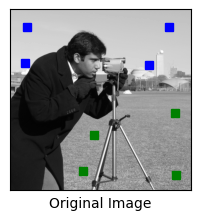

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.axis ('image')
plt.show()

# for each patch, plot (dissimilarity, correlation)

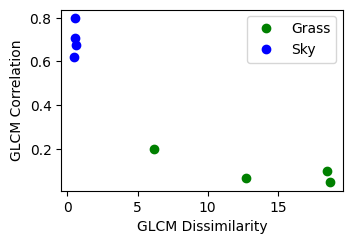

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go', label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo', label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()
plt.show()

# display the image patches

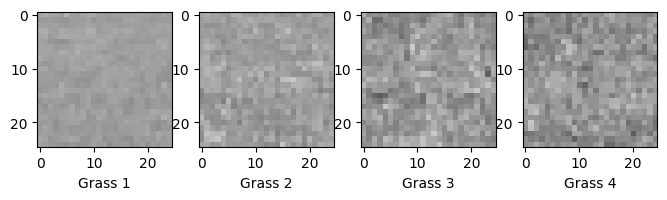

In [15]:
fig = plt.figure(figsize=(8, 8))
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1) 
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))
plt.show()

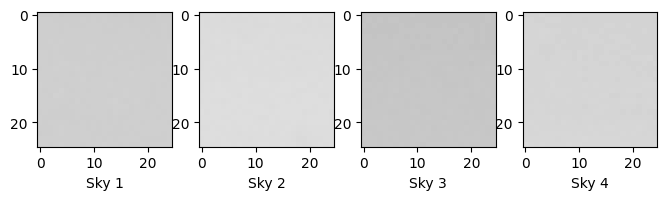

In [16]:
fig = plt.figure(figsize=(8, 8))
for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2+ i + 1) 
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))
plt.show()

# display the patches and plot

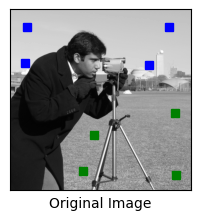

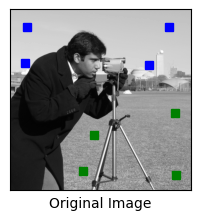

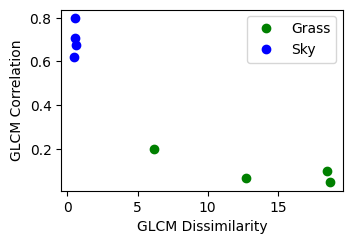

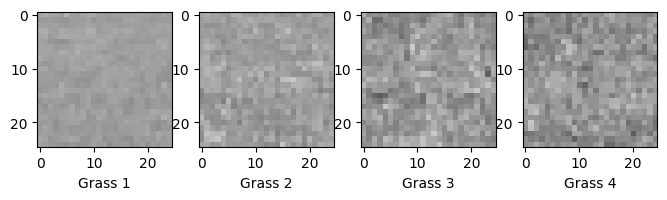

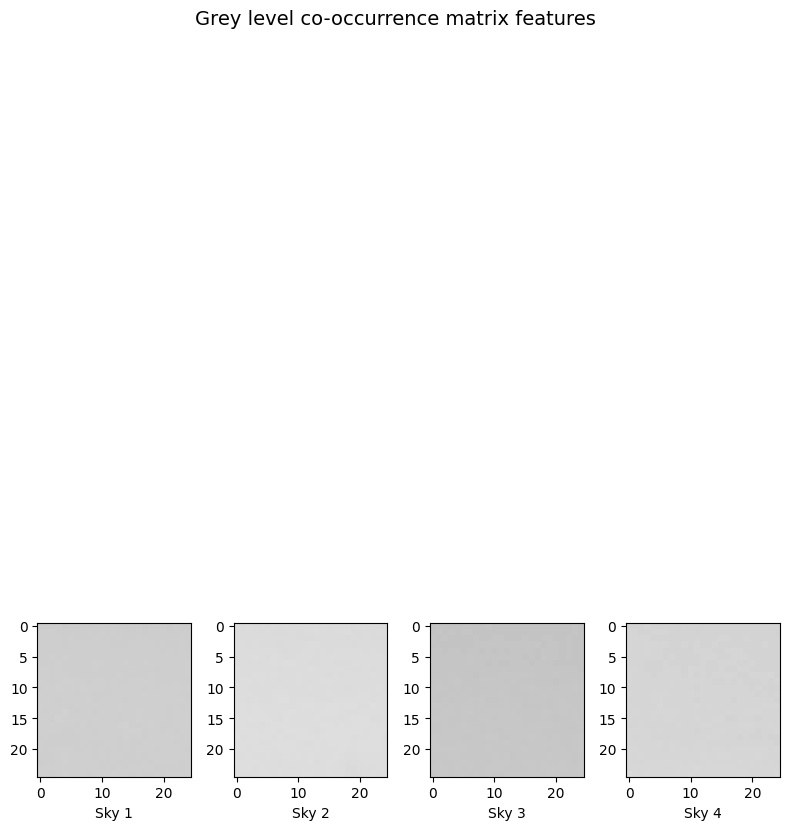

In [92]:
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05) 
plt.tight_layout()
plt.show()